In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

In [29]:
books_df = pd.read_csv('books_enriched.csv')
books_ratings = pd.read_csv('ratings.csv')
books_ratings.drop_duplicates(inplace=True)

In [31]:
books_df.head()

Unnamed: 0  index                            authors  average_rating  \
0           0      0                ['Suzanne Collins']            4.34   
1           1      1  ['J.K. Rowling', 'Mary GrandPré']            4.44   
2           2      2                ['Stephenie Meyer']            3.57   
3           3      3                     ['Harper Lee']            4.25   
4           4      4            ['F. Scott Fitzgerald']            3.89   

   best_book_id  book_id  books_count  \
0       2767052        1          272   
1             3        2          491   
2         41865        3          226   
3          2657        4          487   
4          4671        5         1356   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  Harry Potter's life is miserable. His parents ...   
2  About three things I was absolutely positive.\...   
3  The unforgettable novel of a childhood in a sl...   
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                              genres  goodreads_book_id  ...  \
0  ['young-adult', 'fiction', 'fantasy', 'science...            2767052  ...   
1  ['fantasy', 'fiction', 'young-adult', 'classics']                  3  ...   
2  ['young-adult', 'fantasy', 'romance', 'fiction...              41865  ...   
3  ['classics', 'fiction', 'historical-fiction', ...               2657  ...   
4  ['classics', 'fiction', 'historical-fiction', ...               4671  ...   

  ratings_3 ratings_4  ratings_5 ratings_count  \
0    560092   1481305    2706317       4780653   
1    455024   1156318    3011543       4602479   
2    793319    875073    1355439       3866839   
3    446835   1001952    1714267       3198671   
4    606158    936012     947718       2683664   

                                     small_image_url  \
0  https://images.gr-assets.com/books/1447303603s...   
1  https://images.gr-assets.com/books/1474154022s...   
2  https://images.gr-assets.com/books/1361039443s...   
3  https://images.gr-assets.com/books/1361975680s...   
4  https://images.gr-assets.com/books/1490528560s...   

                                               title  work_id  \
0            The Hunger Games (The Hunger Games, #1)  2792775   
1  Harry Potter and the Sorcerer's Stone (Harry P...  4640799   
2                            Twilight (Twilight, #1)  3212258   
3                              To Kill a Mockingbird  3275794   
4                                   The Great Gatsby   245494   

  work_ratings_count  work_text_reviews_count  \
0            4942365                   155254   
1            4800065                    75867   
2            3916824                    95009   
3            3340896                    72586   
4            2773745                    51992   

                           authors_2  
0                ['Suzanne Collins']  
1  ['J.K. Rowling', 'Mary GrandPré']  
2                ['Stephenie Meyer']  
3                     ['Harper Lee']  
4            ['F. Scott Fitzgerald']  

[5 rows x 30 columns]

In [33]:
books_df = books_df.drop(['Unnamed: 0', 'index', 'best_book_id', 'goodreads_book_id', 'ratings_3', 
               'ratings_4', 'ratings_5', 'work_id', 'work_ratings_count', 'work_text_reviews_count',
               'authors_2', 'isbn', 'isbn13', 'language_code', 'original_publication_year','pages',
               'publishDate', 'ratings_1', 'ratings_2', 'image_url', 'books_count', 'title'], axis=1)
books_df = books_df.rename(columns={'original_title': 'title'})
books_df = books_df[['book_id', 'title', 'authors', 'average_rating', 'ratings_count', 'genres', 'description', 'small_image_url']]
books_df 

book_id                                     title  \
0           1                          The Hunger Games   
1           2  Harry Potter and the Philosopher's Stone   
2           3                                  Twilight   
3           4                     To Kill a Mockingbird   
4           5                          The Great Gatsby   
...       ...                                       ...   
9995     9981                          The Twelfth Card   
9996     9982                                 Feverborn   
9997     9985    Tom Clancy's Net Force: Breaking Point   
9998     9987                         Chasing The Night   
9999    10000                       The First World War   

                                                authors  average_rating  \
0                                   ['Suzanne Collins']            4.34   
1                     ['J.K. Rowling', 'Mary GrandPré']            4.44   
2                                   ['Stephenie Meyer']            3.57   
3                                        ['Harper Lee']            4.25   
4                               ['F. Scott Fitzgerald']            3.89   
...                                                 ...             ...   
9995                               ['[Jeffery Deaver]']            3.98   
9996                           ['[Karen Marie Moning]']            4.18   
9997  ['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...            3.69   
9998                                ['[Iris Johansen]']            4.12   
9999                                  ['[John Keegan]']            4.00   

      ratings_count                                             genres  \
0           4780653  ['young-adult', 'fiction', 'fantasy', 'science...   
1           4602479  ['fantasy', 'fiction', 'young-adult', 'classics']   
2           3866839  ['young-adult', 'fantasy', 'romance', 'fiction...   
3           3198671  ['classics', 'fiction', 'historical-fiction', ...   
4           2683664  ['classics', 'fiction', 'historical-fiction', ...   
...             ...                                                ...   
9995          10188  ['mystery', 'thriller', 'fiction', 'crime', 's...   
9996          11570  ['fantasy', 'paranormal', 'romance', 'fiction'...   
9997           7693  ['fiction', 'thriller', 'books', 'mystery', 's...   
9998          10129  ['mystery', 'fiction', 'thriller', 'suspense',...   
9999           9162    ['history', 'nonfiction', 'historical-fiction']   

                                            description  \
0     WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1     Harry Potter's life is miserable. His parents ...   
2     About three things I was absolutely positive.\...   
3     The unforgettable novel of a childhood in a sl...   
4     Alternate Cover Edition ISBN: 0743273567 (ISBN...   
...                                                 ...   
9995  A high-school girl in Harlem, Geneva Settle, i...   
9996  In Karen Marie Moning’s latest installment of ...   
9997  In the year 2000, computers are the new superp...   
9998  A CIA agent's two-year-old child was stolen in...   
9999  The First World War created the modern world. ...   

                                        small_image_url  
0     https://images.gr-assets.com/books/1447303603s...  
1     https://images.gr-assets.com/books/1474154022s...  
2     https://images.gr-assets.com/books/1361039443s...  
3     https://images.gr-assets.com/books/1361975680s...  
4     https://images.gr-assets.com/books/1490528560s...  
...                                                 ...  
9995  https://images.gr-assets.com/books/1328407138s...  
9996  https://images.gr-assets.com/books/1435195536s...  
9997  https://s.gr-assets.com/assets/nophoto/book/50...  
9998  https://s.gr-assets.com/assets/nophoto/book/50...  
9999  https://images.gr-assets.com/books/1403194704s...  

[10000 rows x 8 columns]

In [34]:
books_ratings_df = books_ratings.groupby(['user_id','book_id']).aggregate(np.max)
print(len(books_ratings_df))
if (len(books_ratings_df) == books_ratings.shape[0]):
  print("there are no such cases where the user has rated the same movie twice.")

/var/folders/73/gwcs1q89075gwd2dyqhx8nyc0000gn/T/ipykernel_54646/3530917371.py:1: FutureWarning: The provided callable <function max at 0x104dbad40> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  books_ratings_df = books_ratings.groupby(['user_id','book_id']).aggregate(np.max)


5976479
there are no such cases where the user has rated the same movie twice.


<Axes: xlabel='rating'>

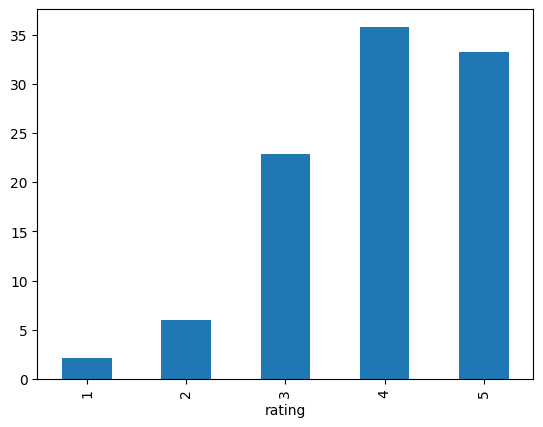

In [35]:
count_rates = books_ratings.groupby('rating').count()
count_rates['perc_total']=round(count_rates['user_id']*100/count_rates['user_id'].sum(),1)
count_rates['perc_total'].plot.bar()

## Genres Distribution:

In [36]:
import ast
def safe_eval(genre_str):
    try:
        return ast.literal_eval(genre_str)
    except ValueError:
        return []  # Return an empty list if evaluation fails

books_df['genres'] = books_df['genres'].apply(safe_eval)
print(books_df['genres'].head())

0    [young-adult, fiction, fantasy, science-fictio...
1            [fantasy, fiction, young-adult, classics]
2    [young-adult, fantasy, romance, fiction, paran...
3    [classics, fiction, historical-fiction, young-...
4     [classics, fiction, historical-fiction, romance]
Name: genres, dtype: object


In [37]:
genres = {}

def find_genres():
    for genre_list in books_df['genres']:
        for genre in genre_list:
            genres[genre] = genres.get(genre, 0) + 1

find_genres()
list_of_genres = list(genres.keys())
print(genres)

{'young-adult': 2756, 'fiction': 8272, 'fantasy': 3746, 'science-fiction': 1428, 'romance': 3307, 'classics': 2110, 'paranormal': 1308, 'historical-fiction': 1793, 'contemporary': 2918, 'mystery': 2481, 'thriller': 1822, 'suspense': 1446, 'crime': 1488, 'nonfiction': 1641, 'history': 860, 'biography': 823, 'memoir': 664, 'poetry': 277, 'chick-lit': 1266, 'christian': 295, 'travel': 203, 'spirituality': 327, 'philosophy': 617, 'psychology': 499, 'horror': 876, 'business': 277, 'science': 452, 'religion': 488, 'self-help': 435, 'art': 221, 'music': 146, 'graphic-novels': 472, 'comics': 455, 'sports': 134, 'manga': 144, 'cookbooks': 79, 'books': 685, 'humor-and-comedy': 4, 'gay-and-lesbian': 2}


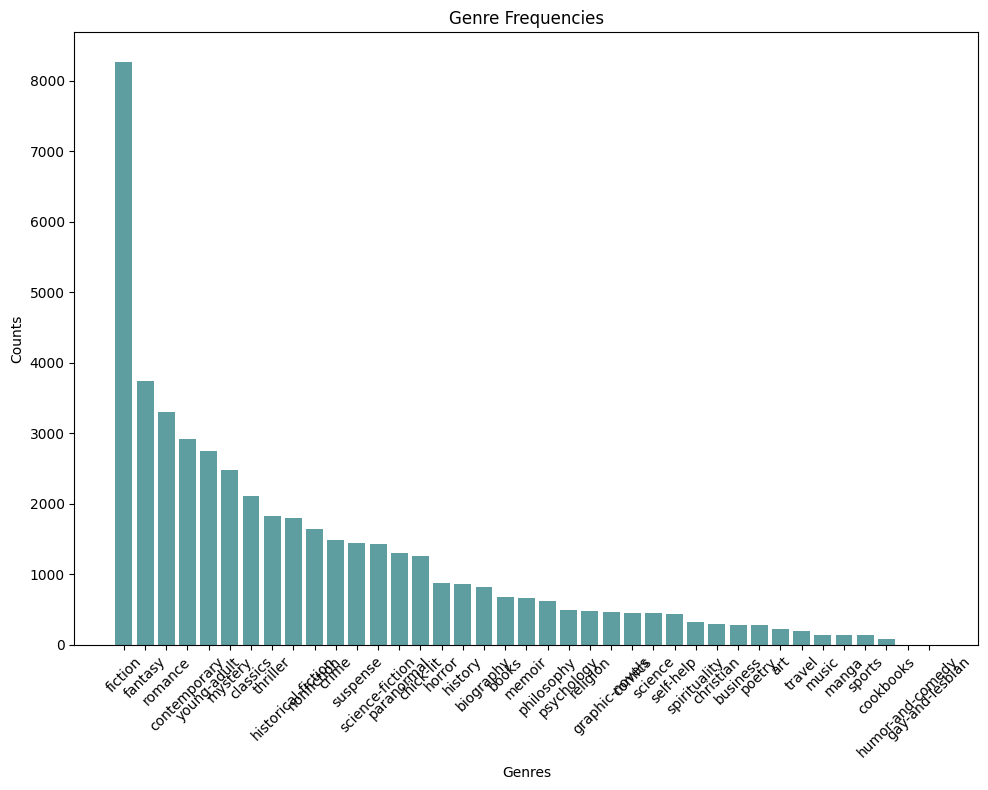

In [38]:
genre_df = pd.DataFrame(list(genres.items()), columns=['Genre', 'Count'])

# Sorting the DataFrame by count to make the chart more informative
genre_df = genre_df.sort_values('Count', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 8))  # Set the size of the figure (optional)
plt.bar(genre_df['Genre'], genre_df['Count'], color='cadetblue')

# Adding title and labels
plt.title('Genre Frequencies')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Books table with genres

In [39]:
BooksWithGenres = books_df.copy()
for genre in list_of_genres :
  BooksWithGenres[genre] = BooksWithGenres.apply(lambda _:int(genre in _.genres), axis = 1)
BooksWithGenres.head()

book_id                                     title  \
0        1                          The Hunger Games   
1        2  Harry Potter and the Philosopher's Stone   
2        3                                  Twilight   
3        4                     To Kill a Mockingbird   
4        5                          The Great Gatsby   

                             authors  average_rating  ratings_count  \
0                ['Suzanne Collins']            4.34        4780653   
1  ['J.K. Rowling', 'Mary GrandPré']            4.44        4602479   
2                ['Stephenie Meyer']            3.57        3866839   
3                     ['Harper Lee']            4.25        3198671   
4            ['F. Scott Fitzgerald']            3.89        2683664   

                                              genres  \
0  [young-adult, fiction, fantasy, science-fictio...   
1          [fantasy, fiction, young-adult, classics]   
2  [young-adult, fantasy, romance, fiction, paran...   
3  [classics, fiction, historical-fiction, young-...   
4   [classics, fiction, historical-fiction, romance]   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  Harry Potter's life is miserable. His parents ...   
2  About three things I was absolutely positive.\...   
3  The unforgettable novel of a childhood in a sl...   
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                     small_image_url  young-adult  fiction  \
0  https://images.gr-assets.com/books/1447303603s...            1        1   
1  https://images.gr-assets.com/books/1474154022s...            1        1   
2  https://images.gr-assets.com/books/1361039443s...            1        1   
3  https://images.gr-assets.com/books/1361975680s...            1        1   
4  https://images.gr-assets.com/books/1490528560s...            0        1   

   ...  art  music  graphic-novels  comics  sports  manga  cookbooks  books  \
0  ...    0      0               0       0       0      0          0      0   
1  ...    0      0               0       0       0      0          0      0   
2  ...    0      0               0       0       0      0          0      0   
3  ...    0      0               0       0       0      0          0      0   
4  ...    0      0               0       0       0      0          0      0   

   humor-and-comedy  gay-and-lesbian  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  

[5 rows x 47 columns]

## List of top scored books over the whole range of books, Using Weighted_Score

In [40]:
avg_book_ratings = pd.DataFrame(books_ratings.groupby('book_id')['rating'].agg(['mean', 'count']))
avg_book_ratings['book_id'] = avg_book_ratings.index
avg_rating_all = books_ratings['rating'].mean()
min_reviews = 20
book_score = avg_book_ratings.loc[avg_book_ratings['count']>min_reviews]
book_score.index.name = None

def weighted_rating(x, m=min_reviews, C=avg_rating_all):
    v = x['count']
    R = x['mean']
    return (v/(v+m) * R) + (m/(m+v) * C)

book_score['weighted_score'] = book_score.apply(weighted_rating, axis=1)

book_score = pd.merge(book_score, BooksWithGenres, on='book_id')

pd.DataFrame(book_score.sort_values(['weighted_score'], ascending=False)[['title', 'count', 'mean', 'weighted_score', 'genres']][:10])

/var/folders/73/gwcs1q89075gwd2dyqhx8nyc0000gn/T/ipykernel_54646/517183725.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_score['weighted_score'] = book_score.apply(weighted_rating, axis=1)


title  count      mean  \
3627                     The Complete Calvin and Hobbes    482  4.829876   
4482  It's a Magical World: A Calvin and Hobbes Coll...    384  4.747396   
1787       The Calvin and Hobbes Tenth Anniversary Book    652  4.728528   
1307                           A Court of Mist and Fury    933  4.718114   
6360  There's Treasure Everywhere: A Calvin and Hobb...    263  4.760456   
6919  The Indispensable Calvin and Hobbes: A Calvin ...    214  4.766355   
6589                The Authoritative Calvin and Hobbes    243  4.757202   
861                                   Words of Radiance   1373  4.702840   
3274                                                NaN    285  4.736842   
8976  The Revenge of the Baby-Sat: A Calvin and Hobb...    176  4.761364   

      weighted_score                                             genres  
3627        4.793620        [comics, graphic-novels, fiction, classics]  
4482        4.706429                  [comics, graphic-novels, fiction]  
1787        4.704460                  [comics, graphic-novels, fiction]  
1307        4.701361  [fantasy, romance, young-adult, fiction, paran...  
6360        4.701051                  [comics, fiction, graphic-novels]  
6919        4.694006                  [comics, fiction, graphic-novels]  
6589        4.693526        [comics, graphic-novels, fiction, classics]  
861         4.691599                                 [fantasy, fiction]  
3274        4.683270          [fantasy, young-adult, fiction, classics]  
8976        4.675496                  [comics, graphic-novels, fiction]

## Getting top n books per genre:

In [41]:
def best_by_genre(genre, top_n):
    return pd.DataFrame(book_score.loc[(book_score[genre]==1)].sort_values(['weighted_score'], ascending=False)[['title', 'count','mean','weighted_score']][:top_n])
best_by_genre('fantasy', 5)

title  count      mean  \
1307                      A Court of Mist and Fury    933  4.718114   
861                              Words of Radiance   1373  4.702840   
3274                                           NaN    285  4.736842   
421                Complete Harry Potter Boxed Set   1915  4.659530   
3752  Harry Potter Collection (Harry Potter, #1-6)    233  4.699571   

      weighted_score  
1307        4.701361  
861         4.691599  
3274        4.683270  
421         4.651885  
3752        4.637934

In [42]:
ratedbooks = pd.merge(books_ratings, books_df, on = 'book_id')
ratedbooks.tail()

user_id  book_id  rating    title        authors  average_rating  \
5976474    36773     9548       5  Vicious  ['L.J. Shen']            4.25   
5976475    50673     9548       4  Vicious  ['L.J. Shen']            4.25   
5976476    45213     9548       3  Vicious  ['L.J. Shen']            4.25   
5976477    12872     9548       4  Vicious  ['L.J. Shen']            4.25   
5976478    46353     9548       5  Vicious  ['L.J. Shen']            4.25   

         ratings_count                            genres  \
5976474          15460  [romance, contemporary, fiction]   
5976475          15460  [romance, contemporary, fiction]   
5976476          15460  [romance, contemporary, fiction]   
5976477          15460  [romance, contemporary, fiction]   
5976478          15460  [romance, contemporary, fiction]   

                                               description  \
5976474  EmiliaThey say love and hate are the same feel...   
5976475  EmiliaThey say love and hate are the same feel...   
5976476  EmiliaThey say love and hate are the same feel...   
5976477  EmiliaThey say love and hate are the same feel...   
5976478  EmiliaThey say love and hate are the same feel...   

                                           small_image_url  
5976474  https://images.gr-assets.com/books/1481945407s...  
5976475  https://images.gr-assets.com/books/1481945407s...  
5976476  https://images.gr-assets.com/books/1481945407s...  
5976477  https://images.gr-assets.com/books/1481945407s...  
5976478  https://images.gr-assets.com/books/1481945407s...

## Heavily Rated Books

In [43]:
df_n_ratings = pd.DataFrame(ratedbooks.groupby('title')['rating'].mean())
df_n_ratings['total_ratings'] = pd.DataFrame(ratedbooks.groupby('title')['rating'].count())
df_n_ratings.sort_values('total_ratings', ascending=False).head(10)

rating  total_ratings
title                                                            
The Hunger Games                          4.279707          22806
Harry Potter and the Philosopher's Stone  4.351350          21850
To Kill a Mockingbird                     4.329369          19088
Twilight                                  3.245738          17657
The Great Gatsby                          3.772224          16604
Catching Fire                             4.133422          16549
Mockingjay                                3.853131          15953
Harry Potter and the Prisoner of Azkaban  4.418732          15855
Harry Potter and the Chamber of Secrets   4.229418          15657
The Hobbit or There and Back Again        4.148477          15558

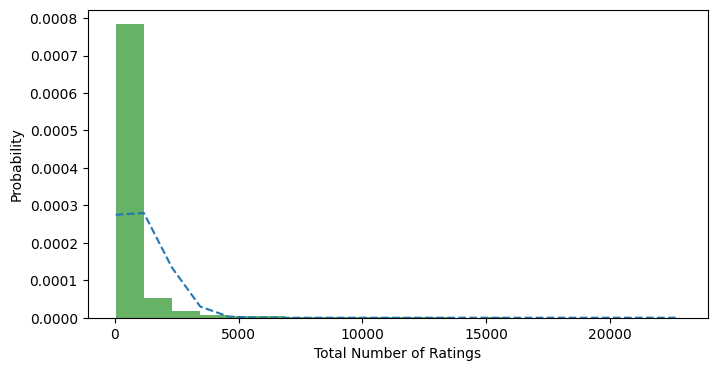

In [44]:
plt.figure(figsize=(8, 4))

# Histogram
n, bins, patches = plt.hist(df_n_ratings['total_ratings'], bins=20, density=True, alpha=0.6, color='g')

# Density plot
mu, sigma = np.mean(df_n_ratings['total_ratings']), np.std(df_n_ratings['total_ratings'])
best_fit_line = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
plt.plot(bins, best_fit_line, '--')

# Adding labels
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')

# Show the plot
plt.show()

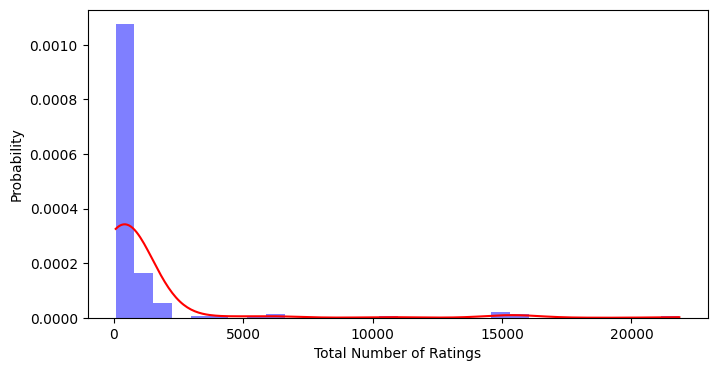

In [45]:
from scipy.stats import gaussian_kde
df = best_by_genre('fantasy', 200)
plt.figure(figsize=(8, 4))

# Histogram
data = df['count']
density, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

# Kernel Density Estimation
kde = gaussian_kde(data, bw_method='scott')  # 'scott' is a rule of thumb for bandwidth
x = np.linspace(min(data), max(data), 300)
kde_values = kde.evaluate(x)

# Plot KDE
plt.plot(x, kde_values, color='red')

# Adding labels and showing the plot
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.show()

## Mean ratings vs Total number of ratings

In [46]:
%matplotlib inline
from matplotlib import gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4)

# Define the axes
ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_yhist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Scatter plot on main axes
x = df_n_ratings['rating']
y = df_n_ratings['total_ratings']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
ax_main.scatter(x, y, c=z, s=50)  # Color by density, no edge color specified

# Histogram on the attached axes
ax_xhist.hist(df_n_ratings['rating'], bins=30, color='blue', alpha=0.7)
ax_yhist.hist(df_n_ratings['total_ratings'], bins=30, orientation='horizontal', color='red', alpha=0.7)

# Turn off tick labels on hist plots
ax_xhist.xaxis.set_tick_params(labelbottom=False)
ax_yhist.yaxis.set_tick_params(labelleft=False)

# Set labels and title
ax_main.set_xlabel('Mean Ratings')
ax_main.set_ylabel('Total Ratings')
ax_xhist.set_title('Joint Plot of Mean Ratings vs Total Ratings')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Here, as the plot shows, every Data Point represents a single book.

# Collaborative Filtering (CF) Recommendation Model - Memory-based

## Item-based Collaborative Filtering

In [47]:
ratings_df = pd.pivot_table(books_ratings, index='user_id', columns='book_id', aggfunc=np.max)
ratings_df.head()

/var/folders/73/gwcs1q89075gwd2dyqhx8nyc0000gn/T/ipykernel_54646/1242284535.py:1: FutureWarning: The provided callable <function max at 0x104dbad40> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ratings_df = pd.pivot_table(books_ratings, index='user_id', columns='book_id', aggfunc=np.max)


rating                                                        ...  \
book_id  1     2     3     4     5     6     7     8     9     10     ...   
user_id                                                               ...   
1          NaN   NaN   NaN   5.0   NaN   NaN   NaN   NaN   NaN   4.0  ...   
2          NaN   5.0   NaN   NaN   5.0   NaN   NaN   4.0   NaN   5.0  ...   
3          NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4          NaN   5.0   NaN   4.0   4.0   NaN   4.0   4.0   NaN   5.0  ...   
5          NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN   NaN  ...   

                                                                     
book_id 9991  9992  9993  9994  9995  9996  9997  9998  9999  10000  
user_id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 10000 columns]

In [48]:
def get_other_books(book_name):
    df_book_users_series = ratedbooks.loc[ratedbooks['title']==book_name]['user_id']
    df_book_users = pd.DataFrame(df_book_users_series, columns=['user_id'])
    other_books = pd.merge(df_book_users, ratedbooks, on='user_id')
    other_users_watched = pd.DataFrame(other_books.groupby('title')['user_id'].count()).sort_values('user_id', ascending=False)
    other_users_watched['perc_who_read'] = round(other_users_watched['user_id']*100/other_users_watched['user_id'][0], 1)
    return other_users_watched[:10]

In [49]:
get_other_books('The Hunger Games')

/var/folders/73/gwcs1q89075gwd2dyqhx8nyc0000gn/T/ipykernel_54646/4194284693.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  other_users_watched['perc_who_read'] = round(other_users_watched['user_id']*100/other_users_watched['user_id'][0], 1)


user_id  perc_who_read
title                                                            
The Hunger Games                             22806          100.0
Catching Fire                                13862           60.8
Harry Potter and the Philosopher's Stone     13146           57.6
Mockingjay                                   13073           57.3
Twilight                                     11909           52.2
To Kill a Mockingbird                         9769           42.8
Män som hatar kvinnor                         8650           37.9
Harry Potter and the Prisoner of Azkaban      8457           37.1
Harry Potter and the Order of the Phoenix     8388           36.8
Harry Potter and the Deathly Hallows          8345           36.6

In [50]:
book_plus_10_ratings = avg_book_ratings.loc[avg_book_ratings['count']>=10]
print("Number of books which has more than 10 ratings: ", len(book_plus_10_ratings))
book_plus_10_ratings.index.name = None
filtered_ratings = pd.merge(book_plus_10_ratings, books_ratings, on='book_id')
print('the number of records in new ratings table: ', len(filtered_ratings))
filtered_ratings.head()

Number of books which has more than 10 ratings:  9999
the number of records in new ratings table:  5976471


mean  count  book_id  user_id  rating
0  4.279707  22806        1     2886       5
1  4.279707  22806        1     6158       5
2  4.279707  22806        1     3991       4
3  4.279707  22806        1     5281       5
4  4.279707  22806        1     5721       5

In [51]:
book_wide = filtered_ratings.pivot(index='book_id', columns='user_id', values='rating').fillna(0)
#book_wide.head()
book_wide_1 = books_ratings.pivot(index='book_id', columns='user_id', values='rating').fillna(0)
book_wide.head()

user_id  1      2      3      4      5      6      7      8      9      10     \
book_id                                                                         
1          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    4.0    0.0   
2          0.0    5.0    0.0    5.0    0.0    0.0    0.0    0.0    4.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    4.0    0.0   
4          5.0    0.0    3.0    4.0    0.0    0.0    0.0    3.0    0.0    5.0   
5          0.0    5.0    0.0    4.0    0.0    0.0    3.0    3.0    5.0    5.0   

user_id  ...  53415  53416  53417  53418  53419  53420  53421  53422  53423  \
book_id  ...                                                                  
1        ...    0.0    0.0    4.0    5.0    4.0    4.0    4.0    4.0    4.0   
2        ...    0.0    0.0    0.0    0.0    5.0    5.0    5.0    5.0    5.0   
3        ...    0.0    0.0    0.0    0.0    3.0    3.0    0.0    0.0    0.0   
4        ...    0.0    0.0    0.0    0.0    3.0    0.0    5.0    0.0    5.0   
5        ...    0.0    0.0    0.0    0.0    3.0    2.0    4.0    0.0    0.0   

user_id  53424  
book_id         
1          4.0  
2          5.0  
3          4.0  
4          5.0  
5          0.0  

[5 rows x 53424 columns]

In [52]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6)
model_knn.fit(book_wide)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [97]:
def similar_books(bookid, rating, tolerance=1.5):
    query_index_book_ratings = book_wide.loc[bookid,:].values.reshape(1,-1)
    distances, indices = model_knn.kneighbors(query_index_book_ratings, n_neighbors=21)
    queried_book_title = books_df.loc[books_df['book_id'] == bookid, 'title'].squeeze()
    if pd.isna(queried_book_title):
        print("The queried book title is not available.")
        return
    
    print(f'Recommendations for {queried_book_title} with a similar rating of {rating}:\n')

    recommendations_count = 0
    i = 1  # Start from the first recommendation after the query book
    recommendations_found = False
    while recommendations_count < 21 and i < len(distances.flatten()):
        indices_flat = indices.flatten()[i]
        recommended_book_id = book_wide.iloc[indices_flat].name
        recommended_book_title = books_df.loc[books_df['book_id'] == recommended_book_id, 'title'].squeeze()
        recommended_book_rating = books_df.loc[books_df['book_id'] == recommended_book_id, 'average_rating'].squeeze()
        
        # Apply a broader criterion if strict matching fails
        if pd.notna(recommended_book_title):
            if np.abs(recommended_book_rating - rating) <= tolerance:
                recommendations_count += 1
                print(f'{recommendations_count}: {recommended_book_title} (Rating: {recommended_book_rating})')
                recommendations_found = True

        i += 1

    # If no recommendations were found within the tolerance, suggest increasing the tolerance
    if not recommendations_found:
        print(f"No recommendations found with a tolerance of {tolerance}. Consider increasing the tolerance or checking the data distribution.")

In [54]:
def find_book_id_by_exact_title(df, title):
    result = df[df['title'] == title]['book_id']
    if not result.empty:
        return result.iloc[0]
    else:
        return "Book title not found"
book_title = 'The Da Vinci Code'
book_id=find_book_id_by_exact_title(books_df, book_title)
print(f"The book ID for '{book_title}' is: {book_id}")

The book ID for 'The Da Vinci Code' is: 26


In [55]:
def find_book_title_by_id(df, book_id):
    result = df[df['book_id'] == book_id]['title']
    if not result.empty:
        return result.iloc[0]
    else:
        return "Book ID not found"

# Example usage
book_id = 22
book_title = find_book_title_by_id(books_df, book_id)
print(f"The title of the book with ID {book_id} is: '{book_title}'")

The title of the book with ID 22 is: 'The Lovely Bones'


In [56]:
book_id = 26
book_title = find_book_title_by_id(books_df, book_id)
print(f"The title of the book with ID {book_id} is: '{book_title}'")

The title of the book with ID 26 is: 'The Da Vinci Code'


In [57]:
similar_books(26, 4)

Recommendations for The Da Vinci Code with a similar rating of 4:

1: Angels & Demons  (Rating: 3.85)
2: The Lost Symbol (Rating: 3.66)
3: Harry Potter and the Goblet of Fire (Rating: 4.53)
4: Harry Potter and the Prisoner of Azkaban (Rating: 4.53)
5: Harry Potter and the Half-Blood Prince (Rating: 4.54)
6: Harry Potter and the Deathly Hallows (Rating: 4.61)
7: Harry Potter and the Order of the Phoenix (Rating: 4.46)
8: Harry Potter and the Chamber of Secrets (Rating: 4.37)
9: Harry Potter and the Philosopher's Stone (Rating: 4.44)
10: To Kill a Mockingbird (Rating: 4.25)
11: The Kite Runner  (Rating: 4.26)
12: Catching Fire (Rating: 4.3)
13: Mockingjay (Rating: 4.03)
14: Deception Point (Rating: 3.67)
15: The Hunger Games (Rating: 4.34)
16: Flickan som lekte med elden (Rating: 4.22)
17: Memoirs of a Geisha (Rating: 4.08)
18: Män som hatar kvinnor (Rating: 4.11)
19: Digital Fortress (Rating: 3.6)
20: Twilight (Rating: 3.57)


# User-based Collaborative Filtering

In [58]:
user_conf_matrix = ratings_df.copy()

user_conf_matrix = user_conf_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
user_conf_matrix.head(5)

rating                                                              \
book_id     1         2         3         4         5         6         7       
user_id                                                                         
1        3.589744  3.589744  3.589744  5.000000  3.589744  3.589744  3.589744   
2        4.415385  5.000000  4.415385  4.415385  5.000000  4.415385  4.415385   
3        1.736264  1.736264  1.736264  3.000000  1.736264  1.736264  1.736264   
4        3.768657  5.000000  3.768657  4.000000  4.000000  3.768657  4.000000   
5        4.040000  4.040000  4.040000  4.040000  4.040000  4.000000  4.040000   

                                       ...                                \
book_id     8         9         10     ...     9991      9992      9993    
user_id                                ...                                 
1        3.589744  3.589744  4.000000  ...  3.589744  3.589744  3.589744   
2        4.000000  4.415385  5.000000  ...  4.415385  4.415385  4.415385   
3        1.736264  1.736264  1.736264  ...  1.736264  1.736264  1.736264   
4        4.000000  3.768657  5.000000  ...  3.768657  3.768657  3.768657   
5        4.040000  4.040000  4.040000  ...  4.040000  4.040000  4.040000   

                                                                               
book_id     9994      9995      9996      9997      9998      9999      10000  
user_id                                                                        
1        3.589744  3.589744  3.589744  3.589744  3.589744  3.589744  3.589744  
2        4.415385  4.415385  4.415385  4.415385  4.415385  4.415385  4.415385  
3        1.736264  1.736264  1.736264  1.736264  1.736264  1.736264  1.736264  
4        3.768657  3.768657  3.768657  3.768657  3.768657  3.768657  3.768657  
5        4.040000  4.040000  4.040000  4.040000  4.040000  4.040000  4.040000  

[5 rows x 10000 columns]

In [59]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(user_conf_matrix.values)
svd = TruncatedSVD(n_components=100)  # Reduce to 100 dimensions, adjust based on your dataset
reduced_matrix = svd.fit_transform(sparse_matrix)
reduced_df = pd.DataFrame(reduced_matrix)

In [60]:
user_corr_mat = reduced_df.T.corr()

In [61]:
corrOfuser1 = user_corr_mat.iloc[0]
corrOfuser1.sort_values(ascending=False, inplace=True)
corrOfuser1.dropna(inplace=True)
top50_corr_users = corrOfuser1[1:51]

mylist = []
for i in range(100):  # Check book IDs from 0 to 99, adjust range as necessary
    if ratedbooks[(ratedbooks['user_id'] == 1) & (ratedbooks['book_id'] == i)].empty:
        mylist.append(i)

print('{}nd Book : '.format(mylist[3]), books_df['title'][books_df['book_id'] == mylist[3]].values)

top50_users = top50_corr_users.index  # assuming this needs to be corrected

count = 0
users = []
for user in top50_users:
    if ratedbooks[(ratedbooks['user_id'] == user) & (ratedbooks['book_id'] == mylist[3])]['rating'].sum():
        count += 1
        users.append(user)

def predict_rating():
    sum_similarity = 0
    weighted_ratings = 0
    for user in users:
        # Use .loc or .iloc instead of .ix depending on your indexing needs
        user_rating = ratedbooks[(ratedbooks['user_id'] == user) & (ratedbooks['book_id'] == mylist[3])]['rating'].sum()
        user_similarity = top50_corr_users.loc[user]
        weighted_ratings += user_similarity * user_rating
        sum_similarity += user_similarity
    return weighted_ratings / sum_similarity if sum_similarity != 0 else 0

predicted_rate = predict_rating()
print('the predicted rate for this book by user 1 is: ', predicted_rate)
print("----------------------------------------------------------")

3nd Book :  ['Twilight']
the predicted rate for this book by user 1 is:  2.545455148346057
----------------------------------------------------------


As seen in this example, we can predict the rate for books which the user did not see and give a rate to them. So, we can make our matrix factorization with this method then recommend the good books to the user by predicted rate. In fact, predicted ratings are calculated similarly for every user, and depending upon the threshold rating, the book is either displayed on his recommended list or discarded. 

# Matrix factorization using keras

In [62]:
print('length of userid: ',len(ratedbooks.user_id.unique())) 
print('length of bookid: ',len(ratedbooks.book_id.unique())) 
all_genres = []
for genre_list in ratedbooks['genres']:
    all_genres.extend(genre_list)

# Convert the list to a set to find unique genres
unique_genres = set(all_genres)
print('Number of unique genres:', len(unique_genres))

length of userid:  53424
length of bookid:  10000
Number of unique genres: 39


In [63]:
newratedbooks = ratedbooks.copy()
newratedbooks['user_id'] = newratedbooks['user_id'].astype('category').cat.codes
newratedbooks['book_id'] = newratedbooks['book_id'].astype('category').cat.codes

newratedbooks['genres'] = newratedbooks['genres'].apply(tuple)
newratedbooks['genre_codes'] = newratedbooks['genres'].astype('category').cat.codes

from sklearn.model_selection import train_test_split
train, test = train_test_split(newratedbooks, test_size=0.2)

In [64]:
train.head()

user_id  book_id  rating                      title  \
2006252    45930      321       3                 Neverwhere   
3691894    29651       50       5              City of Bones   
2278767    42677      132       4       Anne of Green Gables   
2550247     1952      862       5  Guess How Much I Love You   
2173547    44066       43       5               The Notebook   

                                  authors  average_rating  ratings_count  \
2006252                   ['Neil Gaiman']            4.18         268318   
3691894               ['Cassandra Clare']            4.12        1154031   
2278767               ['L.M. Montgomery']            4.23         502247   
2550247  ['Sam McBratney', 'Anita Jeram']            4.36         104690   
2173547             ['[Nicholas Sparks]']            4.06        1053403   

                                                    genres  \
2006252  (fantasy, fiction, science-fiction, horror, yo...   
3691894  (fantasy, young-adult, paranormal, romance, fi...   
2278767  (classics, fiction, young-adult, historical-fi...   
2550247                                (fiction, classics)   
2173547  (romance, fiction, chick-lit, contemporary, cl...   

                                               description  \
2006252  Under the streets of London there's a place mo...   
3691894  When fifteen-year-old Clary Fray heads out to ...   
2278767  As soon as Anne Shirley arrives at the snug wh...   
2550247  "Guess how much I love you," says Little Nutbr...   
2173547  A man with a faded, well-worn notebook open in...   

                                           small_image_url  genre_codes  
2006252  https://images.gr-assets.com/books/1348747943s...          619  
3691894  https://images.gr-assets.com/books/1432730315s...          828  
2278767  https://s.gr-assets.com/assets/nophoto/book/50...          369  
2550247  https://images.gr-assets.com/books/1320457007s...          927  
2173547  https://images.gr-assets.com/books/1385738917s...         3597

In [65]:
test.head()

user_id  book_id  rating  \
1806787    46539     2545       4   
3734704    29084     1447       5   
1870083    13338      264       5   
2018235    30891      792       5   
2485360    21458     1093       3   

                                                     title  \
1806787                                    Lipstick Jungle   
3734704                                              Relic   
1870083                          A Tree Grows In Brooklyn    
2018235  From the Mixed-Up Files of Mrs. Basil E. Frank...   
2485360                                         My Ántonia   

                                                   authors  average_rating  \
1806787  ['[Eugene Bradley Coco', 'Ron Dias', 'J.M. Bar...            3.39   
3734704               ['Douglas Preston', 'Lincoln Child']            4.01   
1870083                                   ['Betty  Smith']            4.24   
2018235                                ['E.L. Konigsburg']            4.15   
2485360                                   ['Willa Cather']            3.76   

         ratings_count                                             genres  \
1806787          35792  (fantasy, classics, fiction, books, history, c...   
3734704          68011  (horror, thriller, mystery, fiction, science-f...   
1870083         291909  (classics, fiction, historical-fiction, young-...   
2018235         134537          (fiction, young-adult, mystery, classics)   
2485360          81102            (classics, fiction, historical-fiction)   

                                               description  \
1806787  With illustrations and vocabulary the kids can...   
3734704  Just days before a massive exhibition opens at...   
1870083  The beloved American classic about a young gir...   
2018235  When suburban Claudia Kincaid decides to run a...   
2485360  Through Jim Burden's endearing, smitten voice,...   

                                           small_image_url  genre_codes  
1806787  https://s.gr-assets.com/assets/nophoto/book/50...          511  
3734704  https://s.gr-assets.com/assets/nophoto/book/50...         2425  
1870083  https://images.gr-assets.com/books/1327883484s...          309  
2018235  https://images.gr-assets.com/books/1327784751s...         1835  
2485360  https://s.gr-assets.com/assets/nophoto/book/50...          290

In [66]:
print('train: ',train.shape)
print('test: ',test.shape)

train:  (4781183, 11)
test:  (1195296, 11)


In [67]:
n_users, n_books, n_genres = len(newratedbooks.user_id.unique()), len(newratedbooks.book_id.unique()), len(newratedbooks.genres.unique())

In [68]:
def matrix_factorisation_model_with_n_latent_factors(n_latent_factors, opt) :
  book_input = keras.layers.Input(shape=(1,),name='Item',dtype='int64')
  book_embedding = keras.layers.Embedding(n_books + 1, n_latent_factors, name='Book-Embedding')(book_input)
  book_vec = keras.layers.Flatten(name='FlattenBooks')(book_embedding)

  user_input = keras.layers.Input(shape=(1,),name='User',dtype='int64')
  user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input)
  user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)
  
  prod = dot([book_vec, user_vec],name='DotProduct', axes = 1)

  model = keras.Model([user_input, book_input], prod)
  model.compile(optimizer = opt , loss = 'mean_squared_error')

  return model

In [69]:
from tensorflow import keras
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Embedding, Input, dot, concatenate
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, ModelCheckpoint
batch_size=128
epochs=30
TESTUSER = 200
n_latent_factors = 10
optimizer = Adam()
model = matrix_factorisation_model_with_n_latent_factors(n_latent_factors, optimizer)

In [70]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Item (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Book-Embedding      │ (None, 1, 10)     │    100,010 │ Item[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Embedding      │ (None, 1, 10)     │    534,250 │ User[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenBooks        │ (None, 10)        │          0 │ Book-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenUsers        │ (None, 10)        │          0 │ User-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DotProduct (Dot)    │ (None, 1)         │          0 │ FlattenBooks[0][… │
│                     │                   │            │ FlattenUsers[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 634,260 (2.42 MB)

 Trainable params: 634,260 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Correcting the file extension to comply with Keras' requirements
callbacks = [
    EarlyStopping('val_loss', patience=2), 
    ModelCheckpoint('bestweights.weights.h5', save_best_only=True, save_weights_only=True)
]

# Continue with your model training setup
History = model.fit(
    [train.user_id, train.book_id], train.rating, 
    batch_size=batch_size, epochs=epochs, 
    validation_data=([test.user_id, test.book_id], test.rating),
    verbose=1, callbacks=callbacks
)


Epoch 1/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step - loss: 8.4473 - val_loss: 0.8092
Epoch 2/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 0.8011 - val_loss: 0.7970
Epoch 3/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - loss: 0.7817 - val_loss: 0.7732
Epoch 4/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 0.7481 - val_loss: 0.7514
Epoch 5/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 98s 3ms/step - loss: 0.7120 - val_loss: 0.7356
Epoch 6/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - loss: 0.6842 - val_loss: 0.7260
Epoch 7/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - loss: 0.6606 - val_loss: 0.7222
Epoch 8/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 0.6429 - val_loss: 0.7185
Epoch 9/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - loss: 0.6302 - val_loss: 0.7187
Epoch 10/30
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - loss: 0.6180 - val_loss: 0.7192


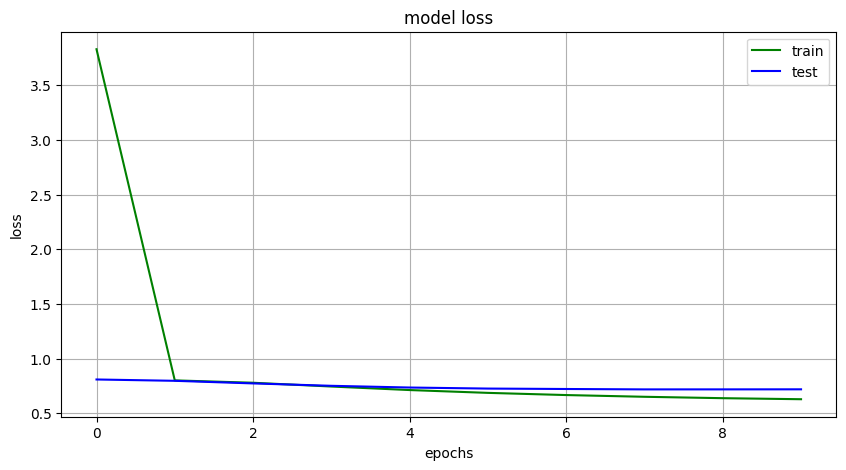

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

In [73]:
import math
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(History.history['val_loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))

Minimum RMSE at epoch 8 = 0.8477


In [74]:
# Use the pre-trained model
model = matrix_factorisation_model_with_n_latent_factors(n_latent_factors, optimizer)
# Load weights
model.load_weights('bestweights.weights.h5')

def predict_rating(user_id, book_id):
    prediction = model.predict([np.array([user_id-1]), np.array([book_id-1])])[0][0]
    return min(prediction, 5)

user_ratings = books_ratings[books_ratings['user_id'] == TESTUSER][['user_id', 'book_id', 'rating']]
user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating(TESTUSER, x['book_id']), axis=1)
user_ratings.sort_values(by='rating', ascending=False).merge(books_df, 
                                                            on='book_id', 
                                                            how='inner', 
                                                            suffixes=['_u', '_b']).head(20)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


user_id  book_id  rating  prediction  \
0       200       38       5    4.363774   
1       200       46       5    4.599898   
2       200     8836       5    3.766664   
3       200     1710       5    3.750799   
4       200     1325       5    4.052115   
5       200      473       5    3.805538   
6       200      905       5    3.734490   
7       200      333       5    4.533268   
8       200      127       5    3.753917   
9       200      642       5    4.397858   
10      200      142       5    4.846886   
11      200       39       5    4.631137   
12      200     6327       5    4.205070   
13      200      110       5    4.866713   
14      200      135       5    4.961658   
15      200     6049       5    3.592247   
16      200      404       5    4.083814   
17      200      188       5    4.710360   
18      200     7655       5    3.754025   
19      200      721       5    4.416276   

                                                title  \
0                            The Time Traveler's Wife   
1                                 Water for Elephants   
2                              True Compass: A Memoir   
3            At Home: A Short History of Private Life   
4                                        The Likeness   
5                                        In the Woods   
6                   Cloudy with a Chance of Meatballs   
7                                         Still Alice   
8   The Tipping Point: How Little Things Can Make ...   
9                                   World Without End   
10                           The Pillars of the Earth   
11                                  A Game of Thrones   
12  The Nine: Inside the Secret World of the Supre...   
13                                   A Clash of Kings   
14                                  A Storm of Swords   
15                                    Bridge of Sighs   
16                                    Defending Jacob   
17                               A Dance with Dragons   
18                              The Ruby in the Smoke   
19                                                NaN   

                            authors  average_rating  ratings_count  \
0            ['Audrey Niffenegger']            3.95         746287   
1                    ['Sara Gruen']            4.07        1068146   
2           ['[Edward M. Kennedy]']            3.99          10111   
3                   ['Bill Bryson']            3.96          55296   
4                 ['[Tana French]']            4.05          72480   
5                 ['[Tana French]']            3.74         188024   
6   ['Judi Barrett', 'Ron Barrett']            4.15         104677   
7                   ['Lisa Genova']            4.30         223432   
8              ['Malcolm Gladwell']            3.92         490504   
9                   ['Ken Follett']            4.23         128715   
10                  ['Ken Follett']            4.29         462517   
11           ['George R.R. Martin']            4.45        1319204   
12               ['Jeffrey Toobin']            4.06          12426   
13           ['George R.R. Martin']            4.40         523303   
14           ['George R.R. Martin']            4.54         469022   
15                ['Richard Russo']            3.79          17013   
16               ['William Landay']            3.97         182025   
17           ['George R.R. Martin']            4.31         365954   
18               ['Philip Pullman']            3.75          16214   
19                  ['Allie Brosh']            4.17         118910   

                                               genres  \
0   [fiction, romance, fantasy, science-fiction, c...   
1   [fiction, historical-fiction, romance, contemp...   
2   [biography, memoir, history, nonfiction, ficti...   
3                      [nonfiction, history, science]   
4   [mystery, fiction, crime, thriller, suspense, ...   
5   [mystery, fiction, thriller, crime, suspense, ...   
6          

In [75]:
recommendations = books_ratings[books_ratings['book_id'].isin(user_ratings['book_id']) == False][['book_id']].drop_duplicates()
recommendations['prediction'] = recommendations.apply(lambda x: predict_rating(TESTUSER, x['book_id']), axis=1)
recommendations.sort_values(by='prediction',
                          ascending=False).merge(books_df,
                                                 on='book_id',
                                                 how='inner',
                                                 suffixes=['_u', '_b']).head(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1

book_id  prediction                                              title  \
0       862    5.000000                                  Words of Radiance   
1      1183    5.000000                                            進撃の巨人 1   
2      1597    5.000000                                   The Power of One   
3      2272    5.000000  Män som hatar kvinnor, Flickan som lekte med e...   
4      3753    5.000000       Harry Potter Collection (Harry Potter, #1-6)   
5      9182    5.000000             Justice: What's the Right Thing to Do?   
6      1618    4.988673                                A Voice in the Wind   
7       960    4.984128                                The Gathering Storm   
8       528    4.961863                                 The Dragon Reborn    
9      3282    4.944635     A Game of Thrones - The Graphic Novel Volume 1   
10     6228    4.932009                                       Fool's Quest   
11     8854    4.921835                           Mark of the Lion Trilogy   
12     8663    4.908718                 Locke & Key, Vol. 6: Alpha & Omega   
13        1    4.907105                                   The Hunger Games   
14     9848    4.906921                                   A Civil Campaign   
15     9842    4.892076                        Humans of New York: Stories   
16     8109    4.870701                   The Absolute Sandman, Volume One   
17     2149    4.861369                                                NaN   
18     5794    4.848217  First They Killed My Father: A Daughter of Cam...   
19     1496    4.845110           A Storm of Swords: Part 2 Blood and Gold   

                                              authors  average_rating  \
0                               ['Brandon Sanderson']            4.77   
1                 ['Hajime Isayama', 'Sheldon Drzka']            4.42   
2                                 ['Bryce Courtenay']            4.34   
3                    ['Stieg Larsson', 'Reg Keeland']            4.46   
4                                    ['J.K. Rowling']            4.73   
5                               ['Michael J. Sandel']            4.25   
6              ['Francine Rivers', 'Richard Ferrone']            4.60   
7              ['Robert Jordan', 'Brandon Sanderson']            4.34   
8                                   ['Robert Jordan']            4.23   
9   ['[Daniel Abraham', 'George R.R. Martin', 'Tom...            4.48   
10                                   ['[Robin Hobb]']            4.53   
11                                ['Francine Rivers']            4.76   
12                  ['Joe Hill', 'Gabriel Rodríguez']            4.50   
13                                ['Suzanne Collins']            4.34   
14                           ['Lois McMaster Bujold']            4.43   
15                                ['Brandon Stanton']            4.50   
16  ['Neil Gaiman', 'Mike Dringenberg', 'Chris Bac...            4.65   
17                             ['George R.R. Martin']            4.63   
18                                      ['Loung Ung']            4.29   
19                             ['George R.R. Martin']            4.56   

    ratings_count                                             genres  \
0           73572                                 [fantasy, fiction]   
1           82565  [graphic-novels, horror, manga, science-fictio...   
2           57312  [fiction, historical-fiction, classics, young-...   
3           29944  [fiction, mystery, thriller, crime, suspense, ...   
4           24618          [fantasy, fiction, young-adult, classics]   
5            8060      [philosophy, nonfiction, psychology, history]   
6           55556  [historical-fiction, christian, fiction, roman...   
7           94095                                 [fantasy, fiction]   
8          153809                                 [fantasy, fiction]   
9           25533  [fantasy, graphic-novels, comics, fiction, man...   
10          12374                      

In [76]:
def matrix_factorisation_model_with_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_movie) :
  
  book_input = keras.layers.Input(shape=[1],name='Book')
  book_embedding = keras.layers.Embedding(n_books + 1, n_latent_factors_movie, name='Book-Embedding')(book_input)
  book_vec = keras.layers.Flatten(name='FlattenBooks')(book_embedding)
  book_vec = keras.layers.Dropout(0.2)(book_vec)


  user_input = keras.layers.Input(shape=[1],name='User')
  user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
  user_vec = keras.layers.Dropout(0.2)(user_vec)


  concat = dot([book_vec, user_vec], name='dot', axes=1)
  concat_dropout = keras.layers.Dropout(0.2)(concat)
  dense = keras.layers.Dense(100,name='FullyConnected')(concat)
  dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
  dense_2 = keras.layers.Dense(50,name='FullyConnected-1')(concat)
  dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
  dense_3 = keras.layers.Dense(20,name='FullyConnected-2')(dense_2)
  dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
  dense_4 = keras.layers.Dense(10,name='FullyConnected-3', activation='relu')(dense_3)


  result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
  adam = Adam(learning_rate=0.001)
  model = keras.Model([user_input, book_input], result)
  model.compile(optimizer=adam,loss= 'mean_absolute_error')
  return model

In [77]:
# batch_size=128
epochs=15
# TESTUSER = 200
n_latent_factors_user=5
n_latent_factors_book=5
model = matrix_factorisation_model_with_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_book)

In [78]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Book (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Book-Embedding      │ (None, 1, 5)      │     50,005 │ Book[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Embedding      │ (None, 1, 5)      │    267,125 │ User[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenBooks        │ (None, 5)         │          0 │ Book-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenUsers        │ (None, 5)         │          0 │ User-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 5)         │          0 │ FlattenBooks[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 5)         │          0 │ FlattenUsers[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ dropout[0][0],    │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FullyConnected-1    │ (None, 50)        │        100 │ dot[0][0]         │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FullyConnected-2    │ (None, 20)        │      1,020 │ FullyConnected-1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FullyConnected-3    │ (None, 10)        │        210 │ FullyConnected-2… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Activation (Dense)  │ (None, 1)         │         11 │ FullyConnected-3… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 318,471 (1.21 MB)

 Trainable params: 318,471 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
callbacks = [EarlyStopping('val_loss', patience=2), 
             ModelCheckpoint('bestweightsdeeper.weights.h5', save_best_only=True, save_weights_only=True)]

History = model.fit([train.user_id,train.book_id],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([test.user_id,test.book_id],test.rating),
                              verbose = 1, callbacks=callbacks)

Epoch 1/15
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - loss: 3.9201 - val_loss: 3.9199
Epoch 2/15
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - loss: 3.9197 - val_loss: 3.9199
Epoch 3/15
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 3.9203 - val_loss: 3.9199


In [80]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

In [81]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(History.history['val_loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))

Minimum RMSE at epoch 1 = 1.9799


In [82]:
model = matrix_factorisation_model_with_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_book)
model.load_weights('bestweightsdeeper.weights.h5')

# Function to predict the ratings given User ID and Movie ID
def predict_rating(user_id, book_id):
    prediction = model.predict([np.array([user_id-1]), np.array([book_id-1])])[0][0]
    return min(prediction, 5)
    
user_ratings = books_ratings[books_ratings['user_id'] == TESTUSER][['user_id', 'book_id', 'rating']]
user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating(TESTUSER, x['book_id']), axis=1)
user_ratings.sort_values(by='rating', 
                         ascending=False).merge(books_df, 
                                                on='book_id', 
                                                how='inner', 
                                                suffixes=['_u', '_b']).head(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1

user_id  book_id  rating  prediction  \
0       200       38       5         0.0   
1       200       46       5         0.0   
2       200     8836       5         0.0   
3       200     1710       5         0.0   
4       200     1325       5         0.0   
5       200      473       5         0.0   
6       200      905       5         0.0   
7       200      333       5         0.0   
8       200      127       5         0.0   
9       200      642       5         0.0   
10      200      142       5         0.0   
11      200       39       5         0.0   
12      200     6327       5         0.0   
13      200      110       5         0.0   
14      200      135       5         0.0   
15      200     6049       5         0.0   
16      200      404       5         0.0   
17      200      188       5         0.0   
18      200     7655       5         0.0   
19      200      721       5         0.0   

                                                title  \
0                            The Time Traveler's Wife   
1                                 Water for Elephants   
2                              True Compass: A Memoir   
3            At Home: A Short History of Private Life   
4                                        The Likeness   
5                                        In the Woods   
6                   Cloudy with a Chance of Meatballs   
7                                         Still Alice   
8   The Tipping Point: How Little Things Can Make ...   
9                                   World Without End   
10                           The Pillars of the Earth   
11                                  A Game of Thrones   
12  The Nine: Inside the Secret World of the Supre...   
13                                   A Clash of Kings   
14                                  A Storm of Swords   
15                                    Bridge of Sighs   
16                                    Defending Jacob   
17                               A Dance with Dragons   
18                              The Ruby in the Smoke   
19                                                NaN   

                            authors  average_rating  ratings_count  \
0            ['Audrey Niffenegger']            3.95         746287   
1                    ['Sara Gruen']            4.07        1068146   
2           ['[Edward M. Kennedy]']            3.99          10111   
3                   ['Bill Bryson']            3.96          55296   
4                 ['[Tana French]']            4.05          72480   
5                 ['[Tana French]']            3.74         188024   
6   ['Judi Barrett', 'Ron Barrett']            4.15         104677   
7                   ['Lisa Genova']            4.30         223432   
8              ['Malcolm Gladwell']            3.92         490504   
9                   ['Ken Follett']            4.23         128715   
10                  ['Ken Follett']            4.29         462517   
11           ['George R.R. Martin']            4.45        1319204   
12               ['Jeffrey Toobin']            4.06          12426   
13           ['George R.R. Martin']            4.40         523303   
14           ['George R.R. Martin']            4.54         469022   
15                ['Richard Russo']            3.79          17013   
16               ['William Landay']            3.97         182025   
17           ['George R.R. Martin']            4.31         365954   
18               ['Philip Pullman']            3.75          16214   
19                  ['Allie Brosh']            4.17         118910   

                                               genres  \
0   [fiction, romance, fantasy, science-fiction, c...   
1   [fiction, historical-fiction, romance, contemp...   
2   [biography, memoir, history, nonfiction, ficti...   
3                      [nonfiction, history, science]   
4   [mystery, fiction, crime, thriller, suspense, ...   
5   [mystery, fiction, thriller, crime, suspense, ...   
6          

In [83]:
recommendations = books_ratings[books_ratings['book_id'].isin(user_ratings['book_id']) == False][['book_id']].drop_duplicates()
recommendations['prediction'] = recommendations.apply(lambda x: predict_rating(TESTUSER, x['book_id']), axis=1)
recommendations.sort_values(by='prediction',
                          ascending=False).merge(books_df,
                                                 on='book_id',
                                                 how='inner',
                                                 suffixes=['_u', '_b']).head(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1

book_id  prediction                                              title  \
0       258         0.0                               La sombra del viento   
1      8327         0.0                              The Left Hand of God    
2      1587         0.0                            Saving CeeCee Honeycutt   
3      1446         0.0                         Emotional Intelligence 2.0   
4      9037         0.0      Y: The Last Man - The Deluxe Edition Book One   
5      5291         0.0                                            ふしぎ遊戯 1   
6      4668         0.0                    Big Nate: In a Class By Himself   
7      3622         0.0                                   The 9th Judgment   
8      6817         0.0  The Unwritten, Volume 1: Tommy Taylor and the ...   
9      8090         0.0                                           Scruples   
10     3433         0.0                     La solitudine dei numeri primi   
11     6452         0.0                                             学園アリス１   
12     5780         0.0                      Shugo Chara! 1 (Shugo Chara!)   
13     6647         0.0                               The Lion & the Mouse   
14     5433         0.0                                   The Burning Land   
15     5910         0.0                                    Not My Daughter   
16     4975         0.0                                       11 Birthdays   
17     4492         0.0                                           Behemoth   
18     4213         0.0                                    Taster's Choice   
19      438         0.0                                  What Alice Forgot   

                                              authors  average_rating  \
0               ['Carlos Ruiz Zafón', 'Lucia Graves']            4.24   
1                                   ['Paul  Hoffman']            3.66   
2                     ['Beth Hoffman', 'Jenna Lamia']            3.92   
3   ['Travis Bradberry', 'Jean Greaves', 'Patrick ...            3.81   
4   ['[Brian K. Vaughan', 'Pia Guerra', 'José Marz...            4.36   
5                        ['Yuu Watase', 'Yuji Oniki']            4.08   
6                                  ['Lincoln Peirce']            4.16   
7              ['[James Patterson', 'Maxine Paetro]']            4.08   
8    ['Mike Carey', 'Bill Willingham', 'Peter Gross']            3.76   
9                                 ['[Judith Krantz]']            3.80   
10              ['Paolo Giordano', 'Shaun Whiteside']            3.58   
11                            ['[Tachibana Higuchi]']            4.23   
12                                      ['Peach-Pit']            4.11   
13                                  ['Jerry Pinkney']            4.23   
14                               ['Bernard Cornwell']            4.29   
15                             ['[Barbara Delinsky]']            3.77   
16                                     ['Wendy Mass']            4.18   
17             ['Scott Westerfeld', 'Keith Thompson']            4.18   
18                  ['[John Layman', 'Rob Guillory]']            4.00   
19                                 ['Liane Moriarty']            4.05   

    ratings_count                                             genres  \
0          263685    [fiction, historical-fiction, mystery, fantasy]   
1           10638   [fantasy, young-adult, fiction, science-fiction]   
2           54341  [fiction, historical-fiction, chick-lit, young...   
3           53384  [psychology, nonfiction, self-help, business, ...   
4           10368  [graphic-novels, comics, science-fiction, fict...   
5           18060  [manga, fantasy, romance, graphic-novels, comi...   
6           20612                  [graphic-novels, fiction, comics]   
7           28593  [mystery, fiction, crime, thriller, suspense, ...   
8           16759  [graphic-novels, comics, fantasy, fiction, mys...   
9           12465  [fiction, romance, chick-lit, contemporary, cl...   
10          19734      [fiction, contem

In [85]:
from keras import layers 
train['genres_str'] = train['genres'].apply(lambda x: ', '.join(x))
test['genres_str'] = test['genres'].apply(lambda x: ', '.join(x))

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_genres_encoded = mlb.fit_transform(train['genres'])
test_genres_encoded = mlb.transform(test['genres'])

def matrix_factorisation_model_with_genres_and_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_book, n_latent_factors_genre) :
  
  genre_input = keras.layers.Input(shape=(train_genres_encoded.shape[1],),name='genre')
  genre_embedding = keras.layers.Embedding(n_books + 1, n_latent_factors_genre, name='genre-Embedding')(genre_input)
  genre_vec = keras.layers.Flatten(name='Flattengenre')(genre_embedding)
  genre_vec = keras.layers.Dropout(0.2)(genre_vec)
  
  
  book_input = keras.layers.Input(shape=[1],name='Book')
  book_embedding = keras.layers.Embedding(n_books + 1, n_latent_factors_book, name='Book-Embedding')(book_input)
  book_vec = keras.layers.Flatten(name='FlattenBooks')(book_embedding)
  book_vec = keras.layers.Dropout(0.2)(book_vec)


  user_input = keras.layers.Input(shape=[1],name='User')
  user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
  user_vec = keras.layers.Dropout(0.2)(user_vec)

  concat = layers.concatenate([genre_vec, user_vec, book_vec], axis=1)
#   concat = dot([movie_vec, user_vec, genre_vec], name='dot', axes=1)
  concat_dropout = keras.layers.Dropout(0.2)(concat)
  dense = keras.layers.Dense(100,name='FullyConnected')(concat)
  dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
  dense_2 = keras.layers.Dense(50,name='FullyConnected-1')(concat)
  dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
  dense_3 = keras.layers.Dense(20,name='FullyConnected-2')(dense_2)
  dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
  dense_4 = keras.layers.Dense(10,name='FullyConnected-3', activation='relu')(dense_3)


  result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
  adam = Adam(learning_rate=0.001)
  model = keras.Model([user_input, book_input, genre_input], result)
  model.compile(optimizer=adam,loss= 'mean_absolute_error')
  return model

In [86]:
batch_size=128
epochs=10
TESTUSER = 200
n_latent_factors_user=5
n_latent_factors_book=5
n_latent_factors_genre=3
model = matrix_factorisation_model_with_genres_and_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_book, n_latent_factors_genre)

In [87]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ genre (InputLayer)  │ (None, 39)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Book (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genre-Embedding     │ (None, 39, 3)     │     30,003 │ genre[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Embedding      │ (None, 1, 5)      │    267,125 │ User[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Book-Embedding      │ (None, 1, 5)      │     50,005 │ Book[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Flattengenre        │ (None, 117)       │          0 │ genre-Embedding[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenUsers        │ (None, 5)         │          0 │ User-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenBooks        │ (None, 5)         │          0 │ Book-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 117)       │          0 │ Flattengenre[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 5)         │          0 │ FlattenUsers[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 5)         │          0 │ FlattenBooks[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 127)       │          0 │ dropout_6[0][0],  │
│ (Concatenate)       │                   │            │ dropout_8[0][0],  │
│                     │                   │            │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FullyConnected-1    │ (None, 50)        │      6,400 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FullyConnected-2    │ (None, 20)        │      1,020 │ FullyConnected-1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FullyConnected-3    │ (None, 10)        │        210 │ FullyConnected-2… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Activation (Dense)  │ (None, 1)         │         11 │ FullyConnected-3… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 354,774 (1.35 MB)

 Trainable params: 354,774 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
callbacks = [EarlyStopping('val_loss', patience=5), 
             ModelCheckpoint('bestweightsdeeper&genre.weights.h5', save_best_only=True, save_weights_only=True)]

History = model.fit(
    [train.user_id.values, train.book_id.values, train_genres_encoded],  # Ensure these inputs are numpy arrays
    train.rating.values,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(
        [test.user_id.values, test.book_id.values, test_genres_encoded],
        test.rating.values
    ),
    verbose=1, callbacks=callbacks
)

Epoch 1/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 0.7215 - val_loss: 0.6540
Epoch 2/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - loss: 0.6536 - val_loss: 0.6439
Epoch 3/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 0.6378 - val_loss: 0.6252
Epoch 4/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - loss: 0.6218 - val_loss: 0.6259
Epoch 5/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - loss: 0.6216 - val_loss: 0.6229
Epoch 6/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - loss: 0.6229 - val_loss: 0.6239
Epoch 7/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - loss: 0.6228 - val_loss: 0.6229
Epoch 8/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - loss: 0.6230 - val_loss: 0.6254
Epoch 9/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - loss: 0.6227 - val_loss: 0.6234
Epoch 10/10
37353/37353 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - loss: 0.6223 - val_loss: 0.6227


In [89]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

In [90]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(History.history['val_loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))

Minimum RMSE at epoch 10 = 0.7891


In [91]:
model = matrix_factorisation_model_with_genres_and_n_latent_factors_and_deeper(n_latent_factors_user, n_latent_factors_book, n_latent_factors_genre)
model.load_weights('bestweightsdeeper&genre.weights.h5')

def predict_rating(user_id, book_id, genre_encoded):
    user_array = np.array([user_id]).reshape(1, -1)
    book_array = np.array([book_id]).reshape(1, -1)
    genre_array = np.array(genre_encoded).reshape(1, -1)  # Confirm this reshape operation is valid
    prediction = model.predict([user_array, book_array, genre_array])[0][0]
    return min(prediction, 5)

# First, remove duplicates in the train DataFrame
train = train.drop_duplicates(subset='book_id')

# Then, re-encode the genres after removing duplicates
mlb = MultiLabelBinarizer()
train_genres_encoded = mlb.fit_transform(train['genres'].apply(tuple))  # Assuming genres are in a column 'genres' as tuples or lists

# Assuming train_genres_encoded is correctly shaped as (n_samples, n_features)
genre_mapping = {k: v for k, v in zip(train['book_id'], train_genres_encoded)}
# Check a few samples to ensure they are arrays and not dictionaries
print(type(genre_mapping[next(iter(genre_mapping))]))  # Check the type of a random entry in the mapping

user_ratings = books_ratings[books_ratings['user_id'] == TESTUSER][['user_id', 'book_id', 'rating']]
# Correctly access genres_encoded for each row
user_ratings['genres_encoded'] = user_ratings['book_id'].apply(lambda x: genre_mapping.get(x, np.zeros((train_genres_encoded.shape[1],))))
user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating(TESTUSER, x['book_id'], genre_mapping.get(x['book_id'], np.zeros(train_genres_encoded.shape[1], dtype=int))), axis=1)
user_ratings.sort_values(by='rating', 
                         ascending=False).merge(books_df, 
                                                on='book_id', 
                                                how='inner', 
                                                suffixes=['_u', '_b']).head(20)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


<class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━

user_id  book_id  rating  \
0       200       38       5   
1       200       46       5   
2       200     8836       5   
3       200     1710       5   
4       200     1325       5   
5       200      473       5   
6       200      905       5   
7       200      333       5   
8       200      127       5   
9       200      642       5   
10      200      142       5   
11      200       39       5   
12      200     6327       5   
13      200      110       5   
14      200      135       5   
15      200     6049       5   
16      200      404       5   
17      200      188       5   
18      200     7655       5   
19      200      721       5   

                                       genres_encoded  prediction  \
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.985560   
1   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...    4.983078   
2   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...    3.985753   
3   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...    3.923017   
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    4.007966   
5   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    4.001362   
6   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...    3.994908   
7   [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...    3.995352   
8   [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    4.009118   
9   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...    3.948399   
10  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...    4.817468   
11  [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...    3.396030   
12  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...    3.990596   
13  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...    3.984240   
14  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...    3.986102   
15  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...    3.995125   
16  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...    4.002498   
17  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.990080   
18  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    3.989286   
19  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.003754   

                                                title  \
0                            The Time Traveler's Wife   
1                                 Water for Elephants   
2                              True Compass: A Memoir   
3            At Home: A Short History of Private Life   
4                                        The Likeness   
5                                        In the Woods   
6                   Cloudy with a Chance of Meatballs   
7                                         Still Alice   
8   The Tipping Point: How Little Things Can Make ...   
9                                   World Without End   
10                           The Pillars of the Earth   
11                                  A Game of Thrones   
12  The Nine: Inside the Secret World of the Supre...   
13                                   A Clash of Kings   
14                                  A Storm of Swords   
15                                    Bridge of Sighs   
16                                    Defending Jacob   
17                               A Dance with Dragons   
18                              The Ruby in the Smoke   
19                                                NaN   

                            authors  average_rating  ratings_count  \
0            ['Audrey Niffenegger']            3.95         746287   
1                    ['Sara Gruen']            4.07        1068146   
2           ['[Edward M. Kennedy]']            3.99          10111   
3                   ['Bill Bryson']            3.96          55296   
4                 ['[Tana French]']            4.05          72480   
5                 ['[Tana French]']            3.74         188024   
6   ['Judi Barrett', 'Ron Barrett']            4.15         104677   
7                   ['Lisa Genova']            4.30         223432   
8              ['Malcolm Gladwell']            3.92  

In [92]:
recommendations = books_ratings[books_ratings['book_id'].isin(user_ratings['book_id']) == False][['book_id']].drop_duplicates()
recommendations['genres_encoded'] = recommendations['book_id'].apply(lambda x: genre_mapping.get(x, np.zeros(train_genres_encoded.shape[1])))
recommendations['prediction'] = recommendations.apply(lambda x: predict_rating(TESTUSER, x['book_id'], x['genres_encoded']), axis=1)
recommendations.sort_values(by='prediction',
                          ascending=False).merge(books_df,
                                                 on='book_id',
                                                 how='inner',
                                                 suffixes=['_u', '_b']).head(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1

book_id                                     genres_encoded  prediction  \
0      1009  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, ...    5.000000   
1       861  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...    5.000000   
2       421  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.999856   
3      1337  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...    4.998444   
4      3627  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, ...    4.997532   
5      1307  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.997248   
6       561  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.997095   
7       779  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, ...    4.996652   
8      1787  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...    4.996176   
9      6589  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, ...    4.995444   
10     6526  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, ...    4.994498   
11     6360  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...    4.993977   
12     4867  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    4.993885   
13      191  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.993880   
14     8945  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...    4.993690   
15       24  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.993672   
16     5206  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...    4.992972   
17     2166  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.992787   
18     6919  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...    4.992463   
19      963  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...    4.992461   

                                                title  \
0                                    The Interestings   
1                                    Walking Disaster   
2                                      The Paris Wife   
3                                        Going Postal   
4                                                 NaN   
5                                   How to Be a Woman   
6                               The Phantom Tollbooth   
7                                      A Fine Balance   
8                                               هيبتا   
9                                             Iceberg   
10                           Kitten's First Full Moon   
11                                      Summer People   
12                                         Skin Trade   
13                                           Watchmen   
14                                  The Next Accident   
15                Harry Potter and the Goblet of Fire   
16                                         Sick Puppy   
17  Zero to One: Notes on Start Ups, or How to Bui...   
18                               Napalm & Silly Putty   
19                                        The Partner   

                                           authors  average_rating  \
0                                 ['Meg Wolitzer']            3.54   
1                                ['Jamie McGuire']            4.23   
2                                 ['Paula McLain']            3.79   
3                              ['Terry Pratchett']            4.36   
4                                ['John Flanagan']            4.42   
5                                ['Caitlin Moran']            3.73   
6               ['Norton Juster', 'Jules Feiffer']            4.22   
7                              ['Rohinton Mistry']            4.34   
8                                    ['محمد صادق']            3.82   
9                                ['Clive Cussler']            3.83   
10                                 ['[Jan Brett]']            4.07   
11                          ['[Elin Hilderbrand]']            3.93   
12                         ['Laurell K. Hamilton']            3.90   
13  ['Alan Moore', 'Dave Gibbons', 'John Higgins']            4.35   
14                                ['Lisa Gardner']            4.16   
15               ['J.K. Rowling', 'Mary GrandPr